In [45]:
import pandas as pd

car_df = pd.read_csv('marketing_customer_analysis_clean.csv')

In [46]:
car_df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [47]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [48]:
car_df.nunique()

unnamed:_0                       10910
customer                          9134
state                                5
customer_lifetime_value           8041
response                             2
coverage                             3
education                            5
effective_to_date                   59
employmentstatus                     5
gender                               2
income                            5694
location_code                        3
marital_status                       3
monthly_premium_auto               202
months_since_last_claim             37
months_since_policy_inception      100
number_of_open_complaints            7
number_of_policies                   9
policy_type                          3
policy                               9
renew_offer_type                     4
sales_channel                        4
total_claim_amount                5106
vehicle_class                        6
vehicle_size                         3
vehicle_type             

In [49]:
car_df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [50]:
car_df['gender'].value_counts()

gender
F    5573
M    5337
Name: count, dtype: int64

### Encoding of categorical variable

In [51]:
# one hot encoding for state, location, marital status, policy type, sales_channel

car_df = pd.get_dummies(car_df, columns = ['state', 'location_code', 'marital_status', 'policy_type', 'sales_channel'])

In [52]:
# ordinal encoding with integers on coverage, education, 
car_df['coverage'] = car_df['coverage'].replace({'Basic': 1, 'Extended': 2, 'Premium': 3})


#binary encoding for gender
car_df['gender'] = car_df['gender'].replace({'F': 0, 'M': 1})

/var/folders/72/b7zxktp96cz1n4tjk3mlbj5w0000gn/T/ipykernel_3136/1014367303.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df['coverage'] = car_df['coverage'].replace({'Basic': 1, 'Extended': 2, 'Premium': 3})
/var/folders/72/b7zxktp96cz1n4tjk3mlbj5w0000gn/T/ipykernel_3136/1014367303.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df['gender'] = car_df['gender'].replace({'F': 0, 'M': 1})


In [53]:
# ordinal encoding for vehicle size:
vsize_encoding = {
    'Small': 0,
    'Medsize': 1,
    'Large': 2
}

# Apply the encoding
car_df['vehicle_size'] = car_df['vehicle_size'].map(vsize_encoding)

In [54]:
# ordinal encoding for education
education_encoding = {
    'High School or Below': 1,
    'College': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctor': 5
}

# Apply the encoding
car_df['education'] = car_df['education'].map(education_encoding)

In [55]:
#binary encoding for gender
car_df['response'] = car_df['response'].replace({'No': 0, 'Yes': 1})

/var/folders/72/b7zxktp96cz1n4tjk3mlbj5w0000gn/T/ipykernel_3136/1463772379.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df['response'] = car_df['response'].replace({'No': 0, 'Yes': 1})


In [56]:
# embedding encoding for vehicle_class, employment_status

# Create a mapping for vehicle class
vehicle_class_mapping = {
    'Two-Door Car': 0,
    'Four-Door Car': 1,
    'SUV': 2,
    'Sports Car': 3,
    'Luxury SUV': 4,
    'Luxury Car': 5
}

# Map the vehicle class column to integers
car_df['vehicle_class_encoded'] = car_df['vehicle_class'].map(vehicle_class_mapping)
car_df #worked
car_df.drop('vehicle_class', axis=1, inplace=True) #drop original column

# then embed in model later

In [57]:
# 2nd embedding employment status
# Create a mapping for employment_status
employmentstatus_mapping = {
    'Medical Leave': 0,
    'Disabled': 1,
    'Unemployed': 2,
    'Retired': 3,
    'Employed': 4
}

# Map the vehicle class column to integers
car_df['employmentstatus_encoded'] = car_df['employmentstatus'].map(employmentstatus_mapping)
car_df #worked
car_df.drop('employmentstatus', axis=1, inplace=True) #drop original column

# then embed in model later

Matplotlib is building the font cache; this may take a moment.
/var/folders/72/b7zxktp96cz1n4tjk3mlbj5w0000gn/T/ipykernel_3136/105060781.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(car_df['total_claim_amount'], shade=True, color='blue')


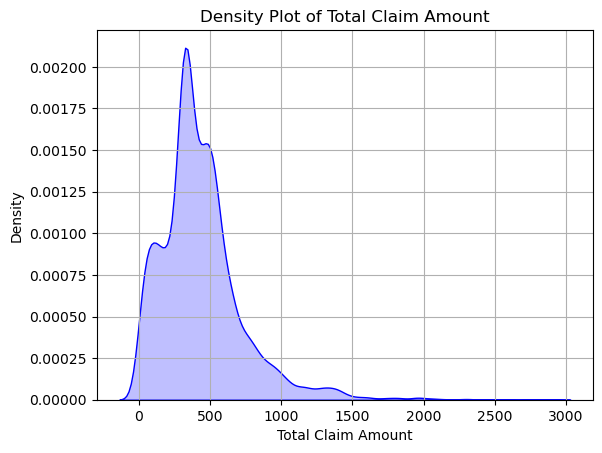

In [58]:
# plot numerical values to see how they can be scaled
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(car_df['total_claim_amount'], shade=True, color='blue')
plt.title('Density Plot of Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [59]:
# scale numerical variables: clv, income, total_claim_amount:

#the target, total claim amount:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler
scaler = MinMaxScaler()

# Reshape the Series to a 2D array
car_df['total_claim_amount_scaled'] = scaler.fit_transform(car_df['total_claim_amount'].values.reshape(-1, 1))

# Check the first few rows to verify
print(car_df[['total_claim_amount', 'total_claim_amount_scaled']].head())

   total_claim_amount  total_claim_amount_scaled
0          292.800000                   0.101171
1          744.924331                   0.257445
2          480.000000                   0.165875
3          484.013411                   0.167263
4          707.925645                   0.244657


/var/folders/72/b7zxktp96cz1n4tjk3mlbj5w0000gn/T/ipykernel_3136/1920652839.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(car_df['income'], shade=True, color='blue')


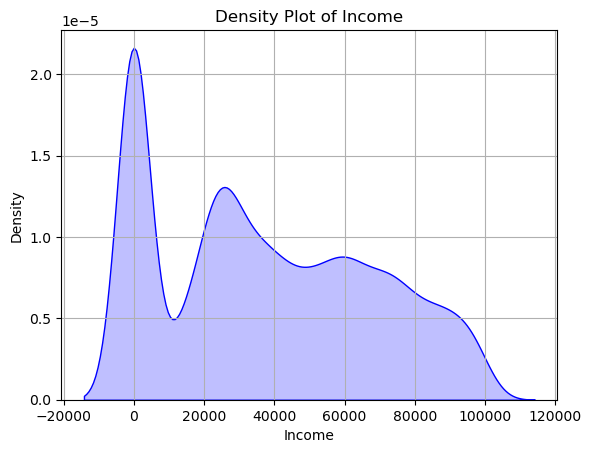

In [60]:
# check distribution of income and clv:

# plot numerical values to see how they can be scaled
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(car_df['income'], shade=True, color='blue')
plt.title('Density Plot of Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(True)
plt.show()

/var/folders/72/b7zxktp96cz1n4tjk3mlbj5w0000gn/T/ipykernel_3136/3841666825.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(car_df['monthly_premium_auto'], shade=True, color='blue')


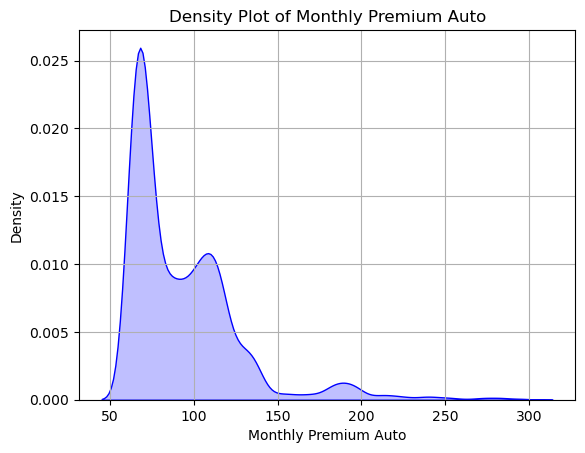

In [61]:
# check distribution of monthly premium auto:

# plot numerical values to see how they can be scaled
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(car_df['monthly_premium_auto'], shade=True, color='blue')
plt.title('Density Plot of Monthly Premium Auto')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [62]:
# scale monthly premium auto

scaler = MinMaxScaler()

# Reshape the Series to a 2D array
car_df['monthly_premium_auto_scaled'] = scaler.fit_transform(car_df['monthly_premium_auto'].values.reshape(-1, 1))

In [63]:
# --> robust scaler for income because of outliers and negative values, log transformation + standard scaler for clv
from sklearn.preprocessing import RobustScaler

# Scale the income variable
scaler_income = RobustScaler()
car_df['income_scaled'] = scaler_income.fit_transform(car_df['income'].values.reshape(-1, 1))

from sklearn.preprocessing import StandardScaler
import numpy as np

# Log-transform the CLV
car_df['clv_log'] = np.log1p(car_df['customer_lifetime_value'])  # log(1 + x) to handle zeros

# Scale the log-transformed CLV
scaler_clv = StandardScaler()
car_df['clv_scaled'] = scaler_clv.fit_transform(car_df['clv_log'].values.reshape(-1, 1))

In [64]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  int64  
 4   coverage                       10910 non-null  int64  
 5   education                      10910 non-null  int64  
 6   effective_to_date              10910 non-null  object 
 7   gender                         10910 non-null  int64  
 8   income                         10910 non-null  int64  
 9   monthly_premium_auto           10910 non-null  int64  
 10  months_since_last_claim        10910 non-null  float64
 11  months_since_policy_inception  10910 non-null  int64  
 12  number_of_open_complaints      10910 non-null 

In [78]:
car_df_features = car_df.drop(columns = ['unnamed:_0', 'customer', 'effective_to_date', 'monthly_premium_auto', 'policy', 'renew_offer_type', 'vehicle_type', 'clv_log', 'income', 'customer_lifetime_value', 'total_claim_amount'])
car_df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   response                       10910 non-null  int64  
 1   coverage                       10910 non-null  int64  
 2   education                      10910 non-null  int64  
 3   gender                         10910 non-null  int64  
 4   months_since_last_claim        10910 non-null  float64
 5   months_since_policy_inception  10910 non-null  int64  
 6   number_of_open_complaints      10910 non-null  float64
 7   number_of_policies             10910 non-null  int64  
 8   vehicle_size                   10910 non-null  int64  
 9   month                          10910 non-null  int64  
 10  state_Arizona                  10910 non-null  bool   
 11  state_California               10910 non-null  bool   
 12  state_Nevada                   10910 non-null 

In [79]:
# done encoding

### Create Neural Network Class and Train Model

In [80]:
from sklearn.model_selection import train_test_split
features = car_df_features.drop(columns = ['total_claim_amount_scaled'])
target = car_df_features['total_claim_amount_scaled']
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 42)

In [81]:
# Convert boolean columns to integers (0/1)
X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int64' for col in X_test.select_dtypes('bool').columns})

In [82]:
X_train.dtypes

response                           int64
coverage                           int64
education                          int64
gender                             int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
vehicle_size                       int64
month                              int64
state_Arizona                      int64
state_California                   int64
state_Nevada                       int64
state_Oregon                       int64
state_Washington                   int64
location_code_Rural                int64
location_code_Suburban             int64
location_code_Urban                int64
marital_status_Divorced            int64
marital_status_Married             int64
marital_status_Single              int64
policy_type_Corporate Auto         int64
policy_type_Personal Auto          int64
policy_type_Special Auto           int64
sales_channel_Ag

In [83]:
import torch
from torch import optim
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [84]:
X_test_tensor.shape

torch.Size([2728, 33])

In [120]:
# model creation

import torch.nn as nn
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size,hidden_size),
                                    nn.Linear(hidden_size,output_size))
    def forward(self, x):
        return self.network(x)

input_size = X_train_tensor.shape[1]
hidden_size = 200
output_size = 1

model = SimpleNN(input_size, hidden_size, output_size)

In [121]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 500
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 0.0263
Epoch [100/500], Loss: 0.0099
Epoch [150/500], Loss: 0.0053
Epoch [200/500], Loss: 0.0039
Epoch [250/500], Loss: 0.0034
Epoch [300/500], Loss: 0.0032
Epoch [350/500], Loss: 0.0030
Epoch [400/500], Loss: 0.0029
Epoch [450/500], Loss: 0.0028
Epoch [500/500], Loss: 0.0027


### Model Evaluation

Test Loss: 0.0026


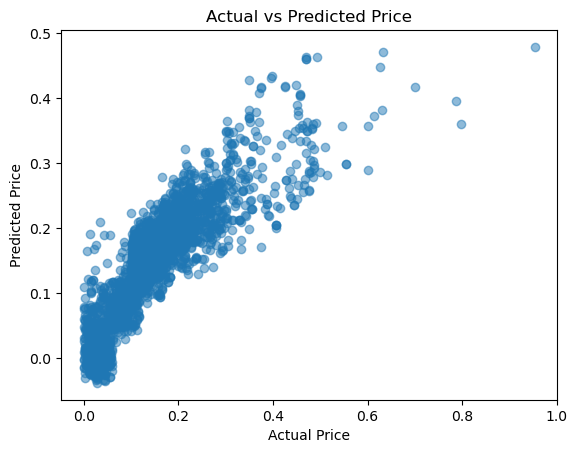

In [122]:
model.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [123]:
from sklearn.metrics import r2_score

# Evaluate the model
#model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    actuals = y_test_tensor.numpy()

r2 = r2_score(actuals, predictions)
print(f'R2 score: {r2:.4f}')

R2 score: 0.7360


### KNN on the same dataset for comparison

In [130]:
# with GridSearch to find best K

#choose most important columns

columns_to_add_for_KNN = ['clv_scaled', 'coverage', 'income_scaled', 'number_of_policies', 'vehicle_class_encoded', 'monthly_premium_auto_scaled', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount_scaled']

KNN_df = car_df[columns_to_add_for_KNN]

In [135]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

features = car_df_features.drop(columns = ['total_claim_amount_scaled'])
target = car_df_features['total_claim_amount_scaled']
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 42)

In [136]:
# Define the model
knn = KNeighborsRegressor()

# Set the range of k values to test
param_grid = {'n_neighbors': range(1, 31)}  # Test k values from 1 to 20

# Use GridSearchCV to find the best k
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 31)},
             scoring='neg_mean_squared_error')

In [137]:
# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")

# Train KNN with the best k
best_knn = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_knn.predict(X_test)

Best k: 5


In [138]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae: .2f}")
print(f"Test Set MSE: {mse:.2f}")
print(f"Test Set R^2: {r2:.2f}")

Mean Absolute Error (MAE):  0.05
Test Set MSE: 0.01
Test Set R^2: 0.39
